# Importing the required libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # to noramlize the data otherwise preprocessing will take time
import biosppy # it contains the function to calculate the RPeaks which is very much required
import warnings
import matplotlib.pyplot as plt
import cv2
warnings.filterwarnings('ignore') # to suppress the warnings

# Data Augmentation 
## Since the data was highly imbalaced because we have majority of normal heart beat and minority of affected or non normal heart beat so it we don't do data augmentation, the model will be biased

In [12]:
def cropping(image, filename,ytrain,g):
    
    #Left Top Crop
    crop = image[:46, :46]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'leftTop' + '.png', crop)
    ytrain.append(g)
    
    #Center Top Crop
    crop = image[:46, 16:50]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'centerTop' + '.png', crop)
    ytrain.append(g)
    
    #Right Top Crop
    crop = image[:46, 32:]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'rightTop' + '.png', crop)
    ytrain.append(g)
    
    #Left Center Crop
    crop = image[16:50, :50]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'leftCenter' + '.png', crop)
    ytrain.append(g)
    
    #Center Center Crop
    crop = image[16:50, 16:50]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'centerCenter' + '.png', crop)
    ytrain.append(g)
    
    #Right Center Crop
    crop = image[16:50, 32:]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'rightCenter' + '.png', crop)
    ytrain.append(g)
    
    #Left Bottom Crop
    crop = image[32:, :50]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'leftBottom' + '.png', crop)
    ytrain.append(g)
    
    #Center Bottom Crop
    crop = image[32:, 16:50]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'centerBottom' + '.png', crop)
    ytrain.append(g)
    
    #Right Bottom Crop
    crop = image[32:, 32:]
    crop = cv2.resize(crop, (64, 64))
    cv2.imwrite(filename[:-4] + 'rightBottom' + '.png', crop)
    ytrain.append(g)

## This is the main block where the following steps are done-->
### 1-Reading of the csv file of the patient 
### 2-Now since the dataset was highly imbalanced, so i had to check how many minimum csv files should i concatenate so that imbalancy is minimized  and value that i got is 20(from r0 to r20)
### After concatenating those 20 files into a single csv, use Standard Scaler to normalize the data otherwise training will take time
### Normally i could have put this data in a machine learning model to train but let's do something different. i converted these 1D data to a 2D data(image)
### To do the above thing, i used biosppy.signals.ecg.christov_segmenter() which helps in finding the RPeaks which helped in plotting the image
### Once image is found i did data augmentation (to minimize imbalancy)  and saved those images to be used in the CNN model

100annotations.csv
['N'] peaks are
[   27  2205  2435  2949  3917  4413  4484  4494  4507  5954  8254 10337
 13464 14380 15887 17352 20616 21652 23567 25592 28353 29006 31104 32747]
2205
1128   -0.036057
1129   -0.034457
1130   -0.032926
1131   -0.031368
1132   -0.029847
          ...   
76     -1.613892
77     -1.612133
78     -1.610447
79     -1.608767
80     -1.607098
Name: Sample, Length: 1204, dtype: float64
2435
81    -1.605418
82    -1.603716
83    -1.601941
84    -1.600186
85    -1.598570
         ...   
458   -0.961275
459   -0.959303
460   -0.957415
461   -0.955517
462   -0.953635
Name: Sample, Length: 372, dtype: float64
2949
463    -0.951743
464    -0.949722
465    -0.947681
466    -0.945682
467    -0.943794
          ...   
1201    0.450019
1202    0.452018
1203    0.453996
1204    0.455910
1205    0.457786
Name: Sample, Length: 741, dtype: float64
3917
1206    0.459684
1207    0.461540
1208    0.463481
1209    0.465559
1210    0.467479
          ...   
60     -1.638779
61

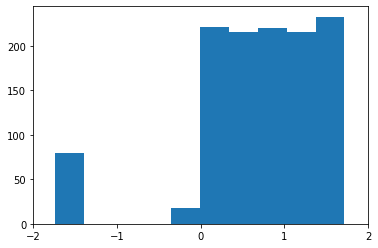

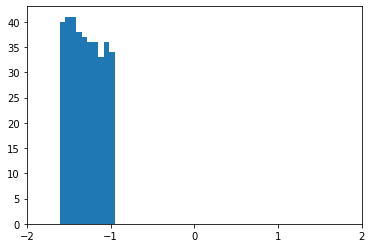

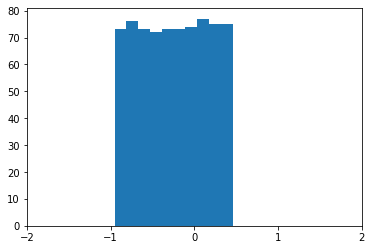

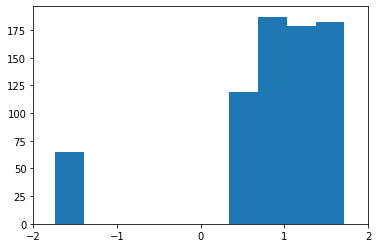

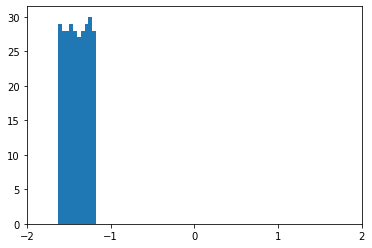

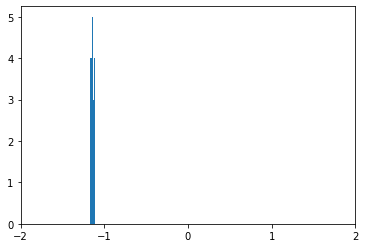

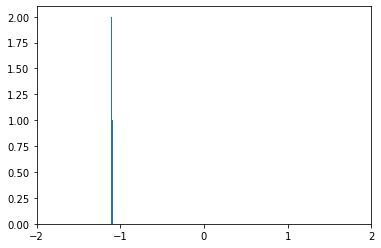

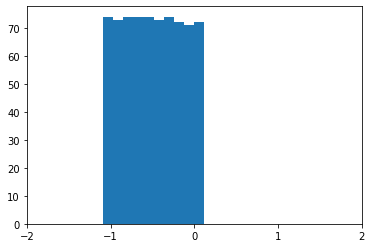

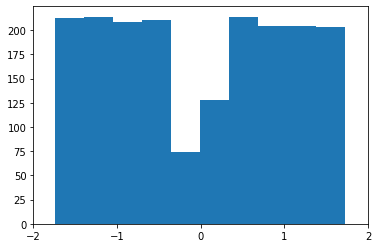

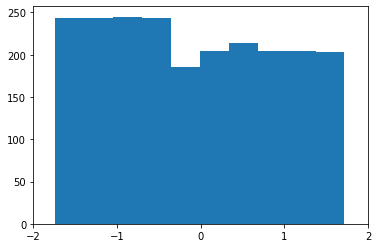

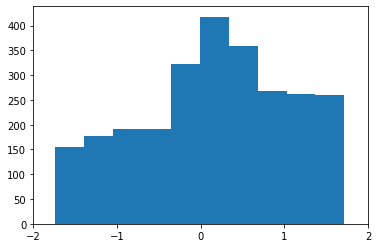

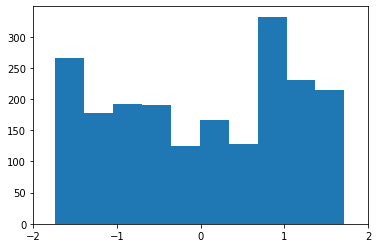

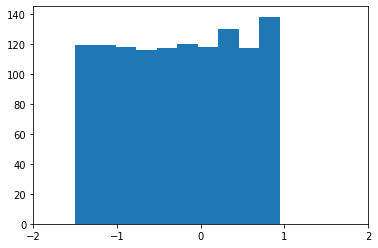

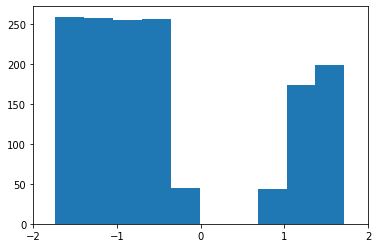

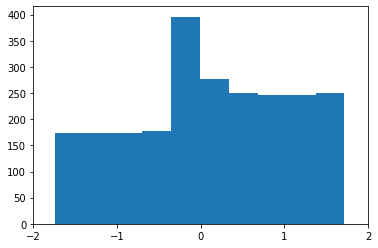

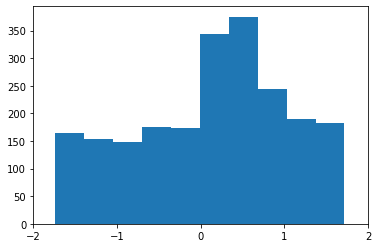

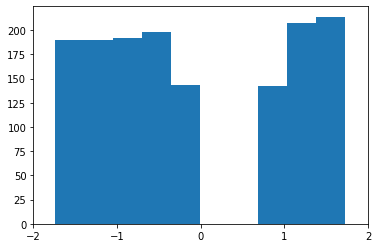

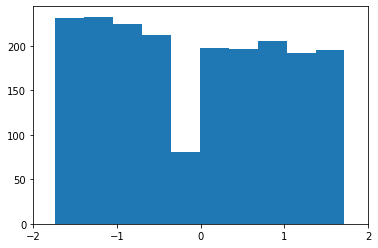

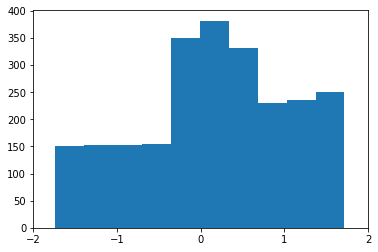

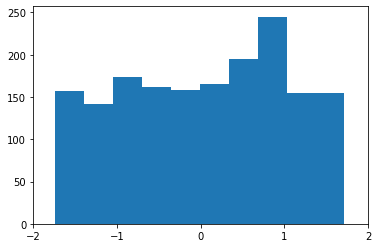

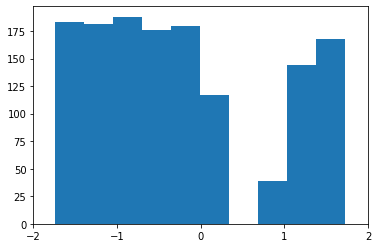

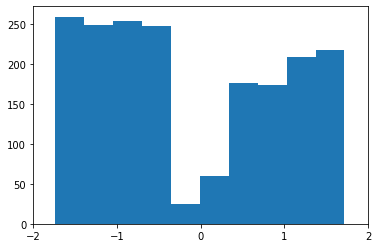

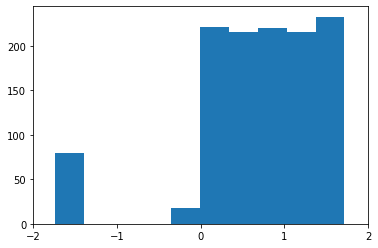

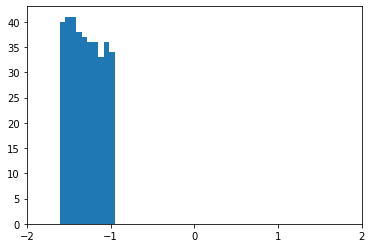

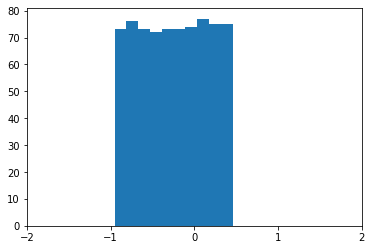

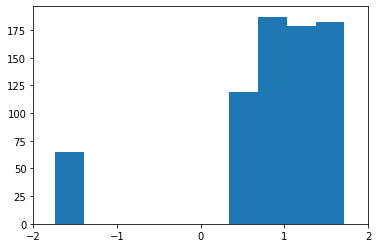

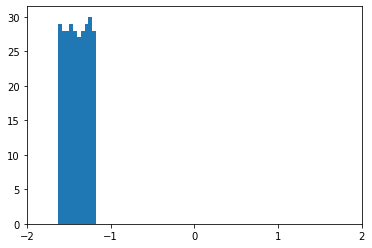

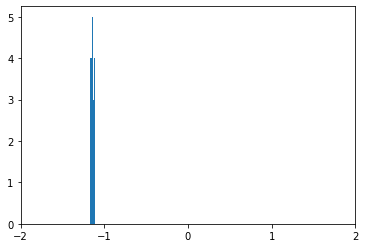

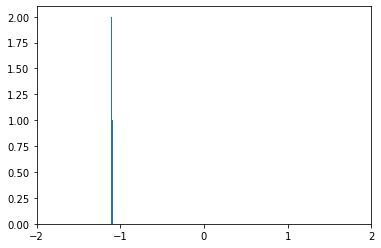

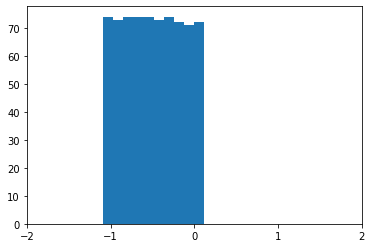

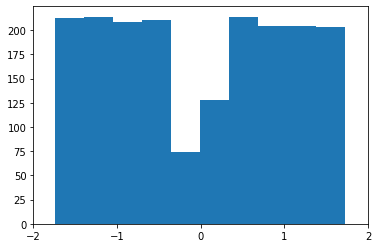

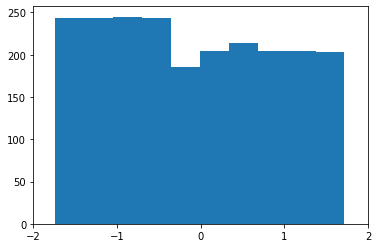

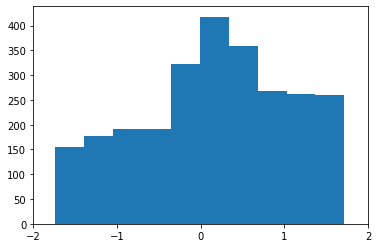

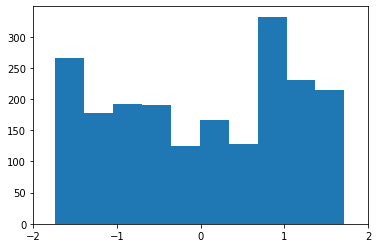

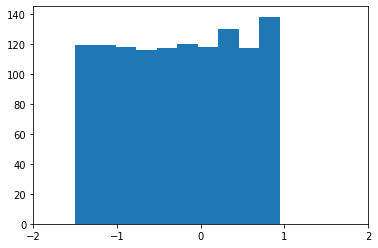

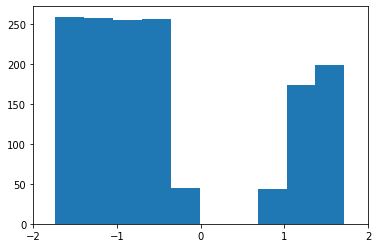

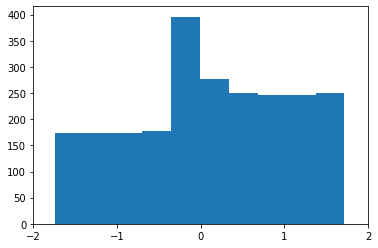

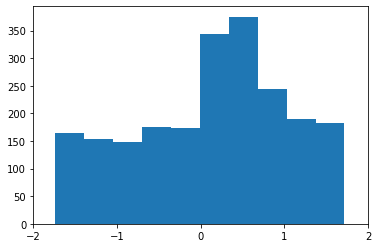

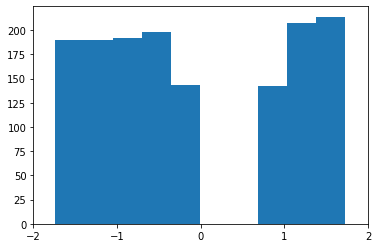

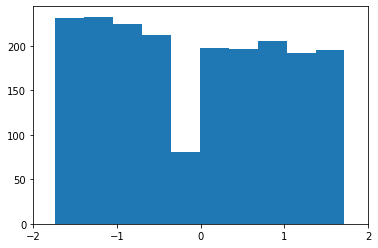

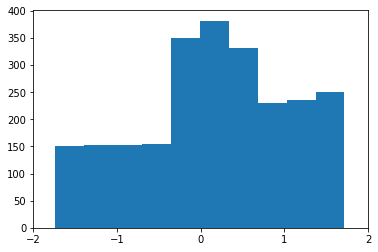

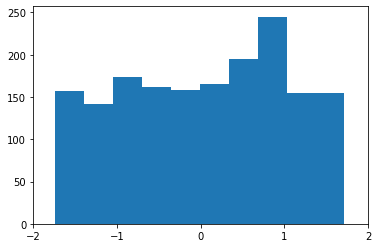

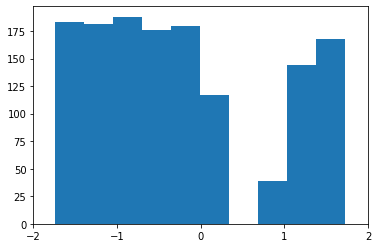

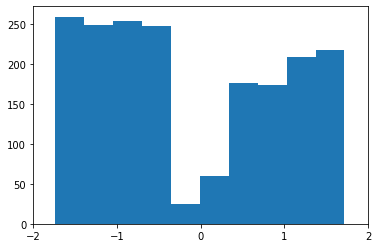

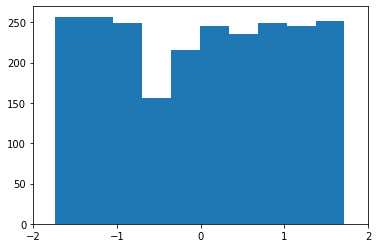

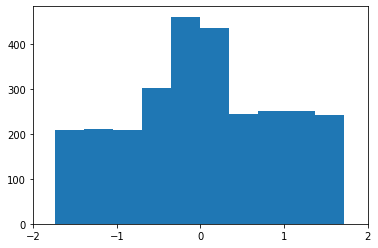

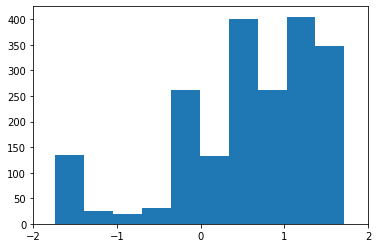

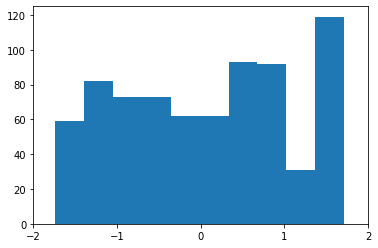

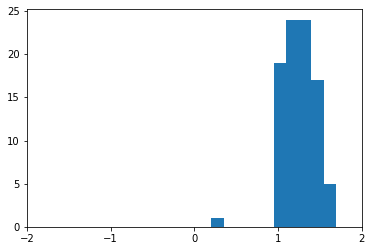

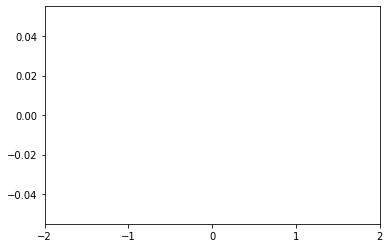

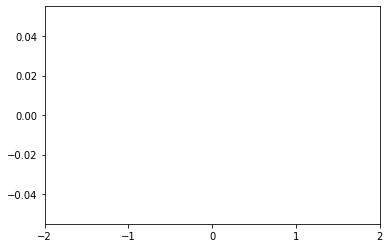

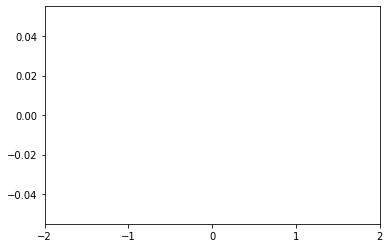

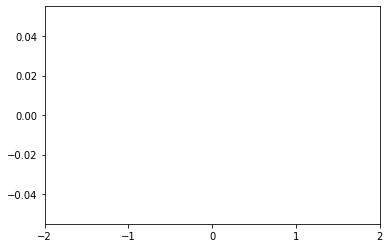

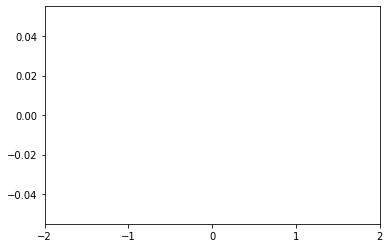

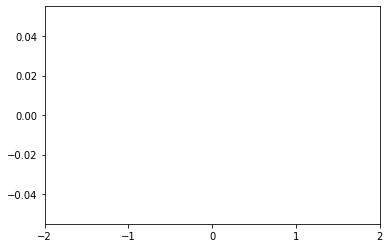

In [14]:
import pandas as pd
w=100
h=(str(w))+'annotations.csv'
pks=[]
signals=[]
xtrain=[]
ytrain=[]
imp=[['N'],['L','A','V']] # we have normal and non normal heartbeat .Non noraml hearbeat can be divided into(L-Left branch block beat, A-Atrial premature contraction, V-Ventricular contraction)
gt=['N','NN']
dt=-1
rohancnt=0
data=pd.DataFrame()
while(w<120):# i was hit and trialing how many minimum files to concatenate to avoid data imbalancy other model will be biased
    h=(str(w))+"annotations.csv"
    r0=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w))+"annotations.csv")
    r1=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+1))+"annotations.csv")
    r2=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+2))+"annotations.csv")
    r3=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+3))+"annotations.csv")
    r4=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+4))+"annotations.csv")
    r5=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+5))+"annotations.csv")
    r6=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+6))+"annotations.csv")
    r7=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+7))+"annotations.csv")
    r8=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+8))+"annotations.csv")
    r9=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+9))+"annotations.csv")
    r10=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+10))+"annotations.csv")
    r11=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+11))+"annotations.csv")
    r12=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+12))+"annotations.csv")
    r13=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+13))+"annotations.csv")
    r14=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+14))+"annotations.csv")
    r15=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+15))+"annotations.csv")
    r16=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+16))+"annotations.csv")
    r17=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+17))+"annotations.csv")
    r18=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+18))+"annotations.csv")
    r19=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+19))+"annotations.csv")
    r20=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\ECG\ecg_files\txt_files"+'\\'+(str(w+20))+"annotations.csv")
    print((str(w))+'annotations.csv')
    r=pd.concat([r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20],axis=0)# concat all those files in one file
    rac=StandardScaler() # data normalization
    r.Sample=rac.fit_transform(r.Sample.values.reshape(-1, 1) )
    for g in imp:
        for h in g:
            ft=r[(r.Type==h)]
            data=pd.concat([data,ft],axis=0)
        
        xtrain=data.Sample
        peaks =  biosppy.signals.ecg.christov_segmenter(signal=xtrain, sampling_rate = 200)[0] # To find the RPeaks of the each type of signal(N,NN)
        print(g,'peaks are')
        print(peaks)
        pks.append(peaks)
    
        dt=dt+1
        signals=[]
        b=0
        b1=[]
        count = 1
        for i in (peaks[1:-1]):
            
            diff1 = abs(peaks[count - 1] - i)# To convert those 1D Rpeaks to 2D RPeaks(image foramt)
            diff2 = abs(peaks[count + 1]- i)#
            x = peaks[count - 1] + diff1//2#
            y = peaks[count + 1] - diff2//2#
            signal = xtrain[x:y]
            print(i)
            print(signal)
            fig = plt.figure(frameon=False)
            #plt.figure()
            plt.hist(signal) # plotting the histogram figure of the RPeaks of the signal
            plt.xticks(np.arange(-2,3,1))
            filename = r'C:\Users\PUTUL SIDDHARTH\Desktop\dspimg2'+'\\'+gt[dt]+'\\'+str(count)+'.png'
            fig.savefig(filename)
            im_gray = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)# Data augmentation should always be done on gray scale images
            im_gray = cv2.resize(im_gray, (64, 64), interpolation = cv2.INTER_LANCZOS4)
            cv2.imwrite(filename, im_gray)  
            cropping(im_gray, filename,ytrain,g)
            ytrain.append(g)
            rohancnt=rohancnt+1
            
        
            signals.append(signal)
            count += 1
        
       # print(signals)
    #x=[i for i in range(len(signals[0]))]
    #plt.scatter(x,signals[0])
    #print(signals)
    
    #print(signals)
    #for count, i in enumerate(signals):
    #    fig = plt.figure(frameon=False)
    #    plt.plot(i) 
    #    plt.xticks([]), plt.yticks([])
    print(ytrain)
    w=w+20

## Here I have used VGG net Model to train my images using Keras

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import warnings
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Flatten

warnings.simplefilter('ignore')
model = Sequential()
model.add(Conv2D(64, (3,3),strides = (1,1), input_shape = (64,64,3),kernel_initializer='glorot_uniform'))
#model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

#model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

#model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

#model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

#model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

#model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides= (2,2)))

model.add(Flatten())

model.add(Dense(2048))

#model.add(keras.layers.ELU())

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_set=ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
train=train_set.flow_from_directory(r'C:\Users\PUTUL SIDDHARTH\Desktop\dspimg1',target_size=(64,64),batch_size=1,class_mode='binary')
model.fit_generator(train,steps_per_epoch=10,epochs=4)

Found 244 images belonging to 2 classes.
Epoch 1/4
10/10 [==============================] - 6s 583ms/step - loss: 1.5333 - accuracy: 0.9000
Epoch 2/4
10/10 [==============================] - 3s 340ms/step - loss: 4.6000 - accuracy: 0.7000
Epoch 3/4
10/10 [==============================] - 3s 339ms/step - loss: 3.0666 - accuracy: 0.8000
Epoch 4/4
10/10 [==============================] - 3s 339ms/step - loss: 1.5333 - accuracy: 0.9000


# After doing 4 epochs on 64*64 size images with 10 steps per epoch I got a decent accuracy of 90%